In [1]:
!pip install spacy

   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.2/12.2 MB 5.6 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.2 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/12.2 MB 7.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/12.2 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/12.2 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.2 MB 9.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.0/12.2 MB 9.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.6/12.2 MB 9.7 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/12.2 MB 9.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/12.2 MB 10.2 MB/s eta 0:00:01
   ---------------- ----------------------- 5.1/12.2 MB 10.3 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.2 MB 10.2 MB/s eta 0:00:01
   

In [2]:
!pip install nltk

In [3]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 657.6 kB/s eta 0:00:20
     - -------------------------------------- 0.3/12.8 MB 2.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/12.8 MB 3.1 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 4.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 5.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 6.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.9/12.8 MB 6.5 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.8 MB 6.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 6.7 MB

In [4]:
import pandas as pd 
import spacy 
import requests 
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)

In [5]:
#NER using spacy
content = "Trinamool Congress leader Mahua Moitra has moved the Supreme Court against her expulsion from the Lok Sabha over the cash-for-query allegations against her. Moitra was ousted from the Parliament last week after the Ethics Committee of the Lok Sabha found her guilty of jeopardising national security by sharing her parliamentary portal's login credentials with businessman Darshan Hiranandani."

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Trinamool Congress 0 18 ORG
Mahua Moitra 26 38 PERSON
the Supreme Court 49 66 ORG
Moitra 157 163 NORP
Parliament 184 194 ORG
last week 195 204 DATE
the Ethics Committee 211 231 ORG
Darshan Hiranandani 373 392 PERSON


In [6]:
#Visualize
from spacy import displacy
displacy.render(doc,style="ent")

In [14]:
entities=[(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df=pd.DataFrame(entities,columns=['text','type','lemma'])
print(df)

                   text    type                 lemma
0    Trinamool Congress     ORG    Trinamool Congress
1          Mahua Moitra  PERSON          Mahua Moitra
2     the Supreme Court     ORG     the Supreme Court
3                Moitra    NORP                Moitra
4            Parliament     ORG            Parliament
5             last week    DATE             last week
6  the Ethics Committee     ORG  the Ethics Committee
7   Darshan Hiranandani  PERSON   Darshan Hiranandani


In [15]:
#performing NER in NLP
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
#use spacy extract entities
import spacy
nlp=spacy.load("en_core_web_sm")
text="Barack Obama was born in Hawaii and served as the President of the United States."
doc=nlp(text)
print("Entities:")
for ent in doc.ents:
    print(f"{ent.text}-{ent.label_}")

Entities:
Barack Obama-PERSON
Hawaii-GPE
the United States-GPE


In [18]:
#using nltk
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download("words")
text="Barack Obama was born in Hawaii and served as the President of the United States."
words=word_tokenize(text)
pos_tag=pos_tag(words)
entities=ne_chunk(pos_tag)
print("Entities:")
for subtree in entities:
    if isinstance (subtree,Tree):
        entity_name="".join([token for token, pos in subtree.leaves()])
        entity_type=subtree.label()
        print(f"{entity_name}-{entity_type}")
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Entities:
Barack-PERSON
Obama-PERSON
Hawaii-GPE
UnitedStates-GPE


C:\Users\preshtha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy:1.0

Confusion matrix:
[[2]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



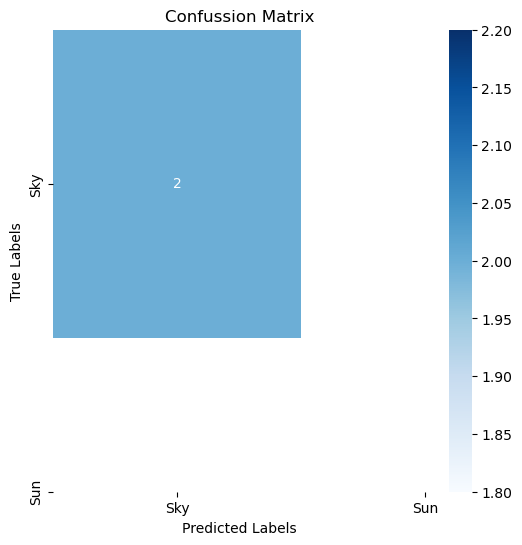

In [33]:
#Text classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
import seaborn as sns
corpus = ['The sky is blue.', 'The sun is bright today.', 
          'The sun in the sky is bright.', 'We can see the shining sun, the bright sun.']
y=np.array([0,1,1,1])
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5, random_state=42)
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}\n")
print("Confusion matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Sky','Sun'],yticklabels=['Sky','Sun'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confussion Matrix')
plt.show()

In [34]:
!pip install pandas scikit-learn

In [61]:

import pandas as pd
df=pd.read_csv("C:/Users/preshtha/Documents/dataset/Reviews.tsv",sep='\t')
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
df=pd.read_csv("C:/Users/preshtha/Documents/dataset/Reviews.tsv",sep='\t')
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [23]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
df=pd.read_csv(r"C:\Users\preshtha\Documents\dataset\Restaurant_Reviews.tsv",sep='\t')
print("Dataset Preview:")
print(df.head())
categories = ['service', 'food', 'ambiance', 'value', 'overall']
df['Category'] = [random.choice(categories) for _ in range(len(df))]
print("\nUpdated DataFrame with Random Categories:")
print(df.head())

Dataset Preview:
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

Updated DataFrame with Random Categories:
                                              Review  Liked  Category
0                           Wow... Loved this place.      1  ambiance
1                                 Crust is not good.      0   overall
2          Not tasty and the texture was just nasty.      0  ambiance
3  Stopped by during the late May bank holiday of...      1   overall
4  The selection on the menu was great and so wer...      1   service


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X=df['Review']
y=df['Category']
vectorizer=TfidfVectorizer(stop_words='english',lowercase=True)
X_tfidf=vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.5, random_state=12)

model = MultinomialNB()  


model.fit(X_train, y_train)



MultinomialNB()

In [9]:
y_pred=model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

    ambiance       0.29      0.04      0.07       106
        food       0.18      0.17      0.17        99
     overall       0.21      0.55      0.30        96
     service       0.11      0.04      0.06       103
       value       0.22      0.23      0.23        96

    accuracy                           0.20       500
   macro avg       0.20      0.21      0.17       500
weighted avg       0.20      0.20      0.16       500

Accuracy: 0.2


In [12]:
import pandas as pd
import random
df=pd.read_csv(r"C:\Users\preshtha\Documents\dataset\Restaurant_Reviews.tsv",sep='\t')
print("Dataset Preview:")
print(df.head())
categories = ['service', 'food', 'ambiance', 'value', 'overall']
df['Category'] = [random.choice(categories) for _ in range(len(df))]
df_labeled = df.copy()  
print("\nUpdated DataFrame with Random Categories:")
print(df_labeled.head())

Dataset Preview:
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

Updated DataFrame with Random Categories:
                                              Review  Liked  Category
0                           Wow... Loved this place.      1  ambiance
1                                 Crust is not good.      0   service
2          Not tasty and the texture was just nasty.      0   service
3  Stopped by during the late May bank holiday of...      1     value
4  The selection on the menu was great and so wer...      1     value


In [13]:
print(df.head())

                                              Review  Liked  Category
0                           Wow... Loved this place.      1  ambiance
1                                 Crust is not good.      0   service
2          Not tasty and the texture was just nasty.      0   service
3  Stopped by during the late May bank holiday of...      1     value
4  The selection on the menu was great and so wer...      1     value


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize  
nltk.download('punkt')  
nltk.download('stopwords') 
nltk.download('wordnet')  
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\preshtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
df['Review'] = df['Review'].apply(preprocess_text)
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Review'])
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [26]:
labels=kmeans.labels_
cluster_names={0: 'Food', 1: 'Services', 2: 'Ambiance'}
df['cluster']=[cluster_names[label] for label in labels]
print(df[['Review','cluster']])

                                                Review   cluster
0                             Wow... Loved this place.      Food
1                                   Crust is not good.      Food
2            Not tasty and the texture was just nasty.      Food
3    Stopped by during the late May bank holiday of...      Food
4    The selection on the menu was great and so wer...      Food
..                                                 ...       ...
995  I think food should have flavor and texture an...  Services
996                           Appetite instantly gone.      Food
997  Overall I was not impressed and would not go b...      Food
998  The whole experience was underwhelming, and I ...      Food
999  Then, as if I hadn't wasted enough of my life ...      Food

[1000 rows x 2 columns]


In [29]:
for cluster in df['cluster'].unique():
    print("Cluster:",cluster)
    print(df[df['cluster'] == cluster]['Review'].tolist())
    print("\n")

Cluster: Food
['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.', 'Now I am getting angry and I want my damn pho.', "Honeslty it didn't taste THAT fresh.)", 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'The fries were great too.', 'A great touch.', 'Would not go back.', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.', 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!', 'I was disgusted because I was pretty sure that was human hair.', 'I was shocked because no signs indicate cash only.', 'Highly recommended.', 'This place is not worth your time, let alone Vegas.', 'did not like at all.', 'The Burrittos Blah!', 'I could care less... The interior is just beauti